In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [5]:
# read in data
player_fps = {} # dictionary with avg and min fps and single avg and min fps
LOG_FILE = os.path.join(os.curdir, r'log\prolog1.log')
with open(LOG_FILE, 'r') as fhandle:
    player_name = ''
    for line in fhandle:
        if '[OPT] (FPS)' in line:     
            #print(line)
            if 'Avg. FPS for' in line:
                start_ix = line.index('Avg. FPS for')
                start_player_ix = start_ix + len('Avg. FPS for ')
                player_name = line[start_player_ix:].split(':')[0]
                player_fps[player_name] = [[int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')[:-1]]]
            if 'Min. FPS for' in line:
                start_ix = line.index('Min. FPS for')
                player_fps[player_name].append([int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')[:-1]])
            if 'Single avg. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
            if 'Single min. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
                
        

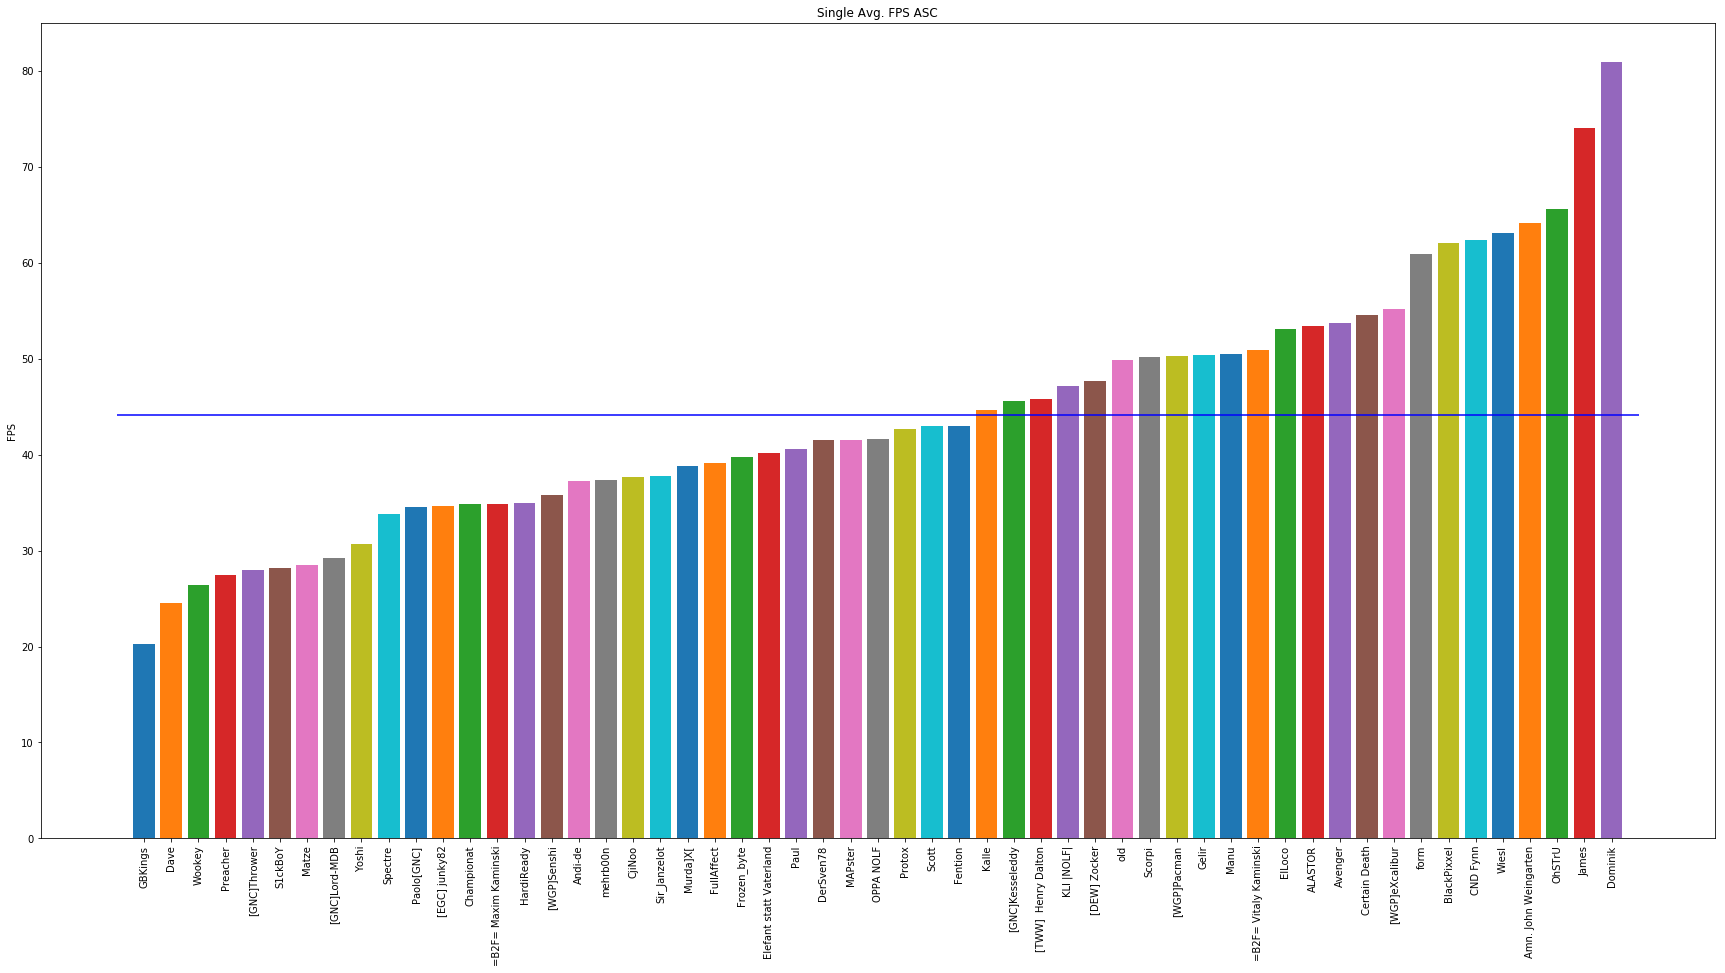

In [6]:
# plot data
col = 2
# single avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("Single Avg. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_avg_fps.png"))

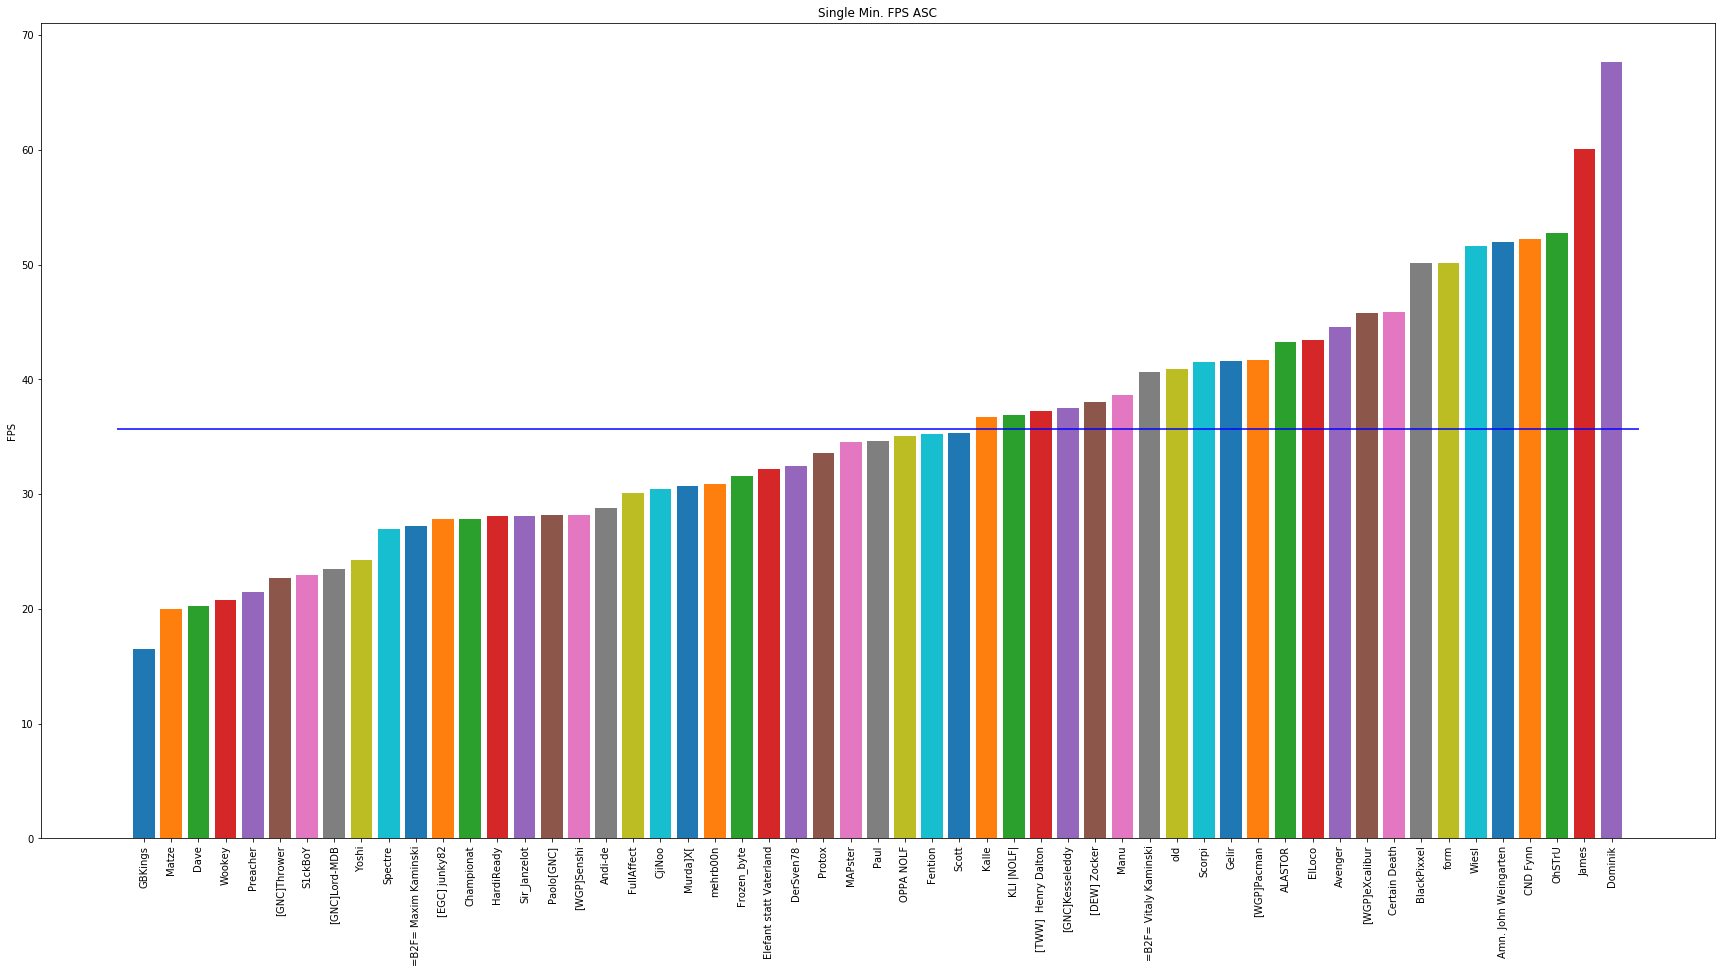

In [11]:
# plot data
col = 3
# single min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("Single Min. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_min_fps.png"))

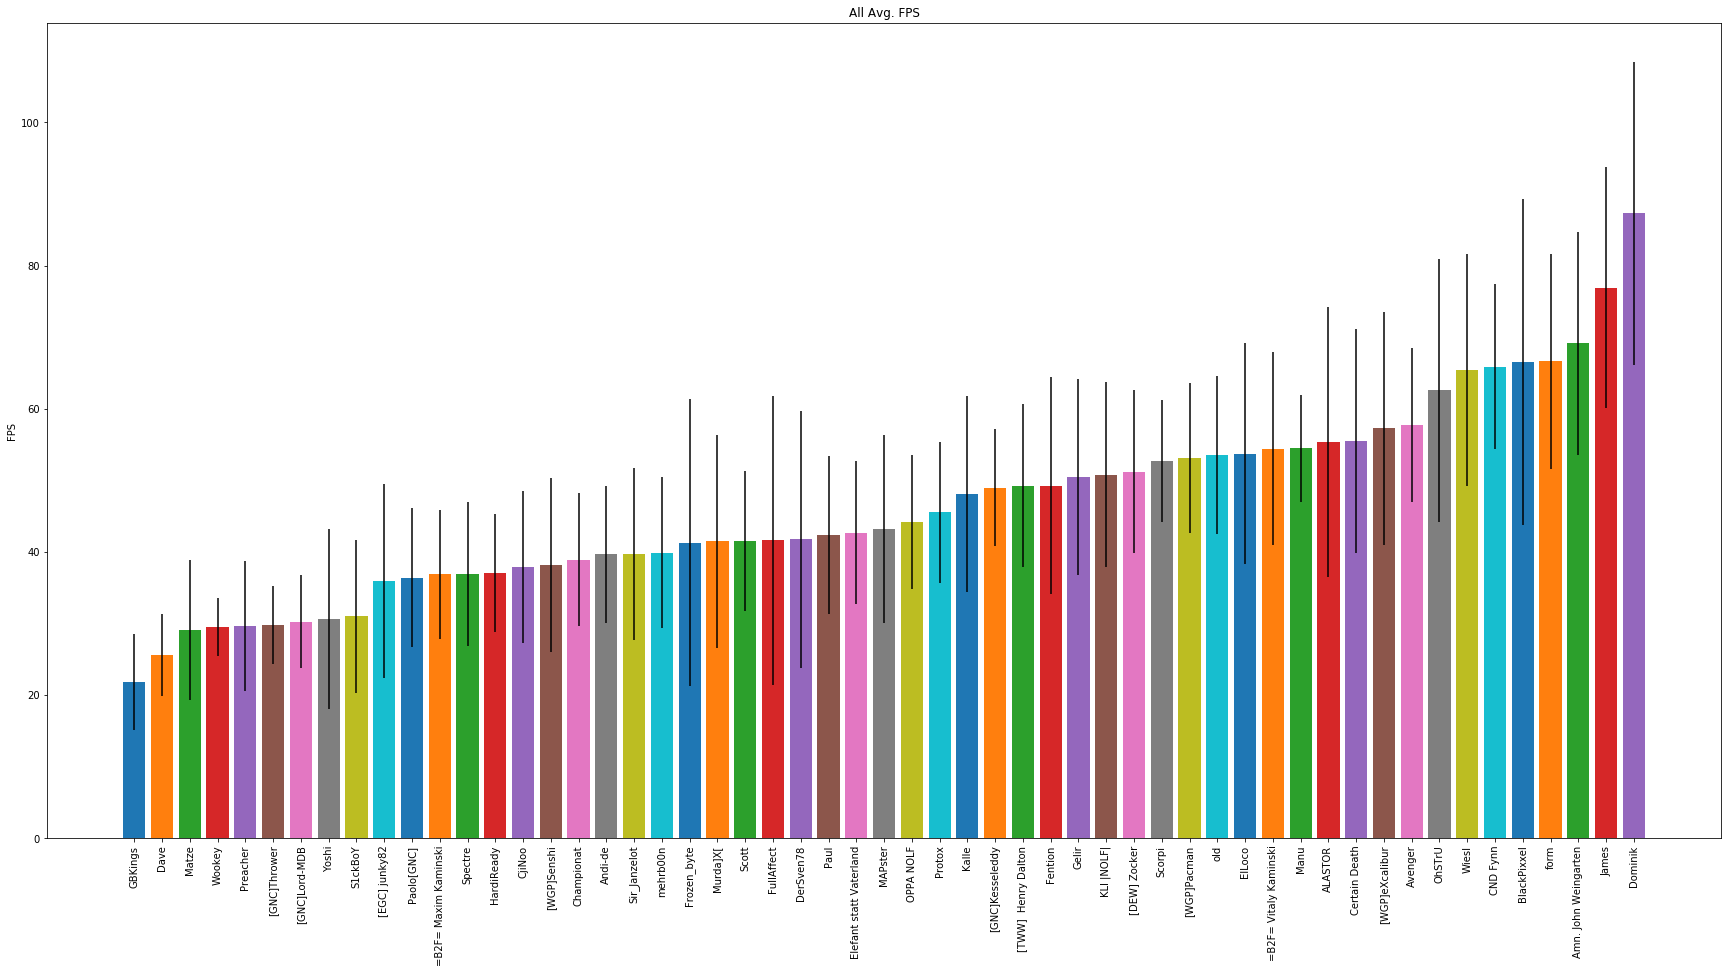

In [12]:
# plot data
col = 0
# all avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Avg. FPS")
plt.savefig(os.path.join(os.curdir, r"output\all_avg_fps.png"))

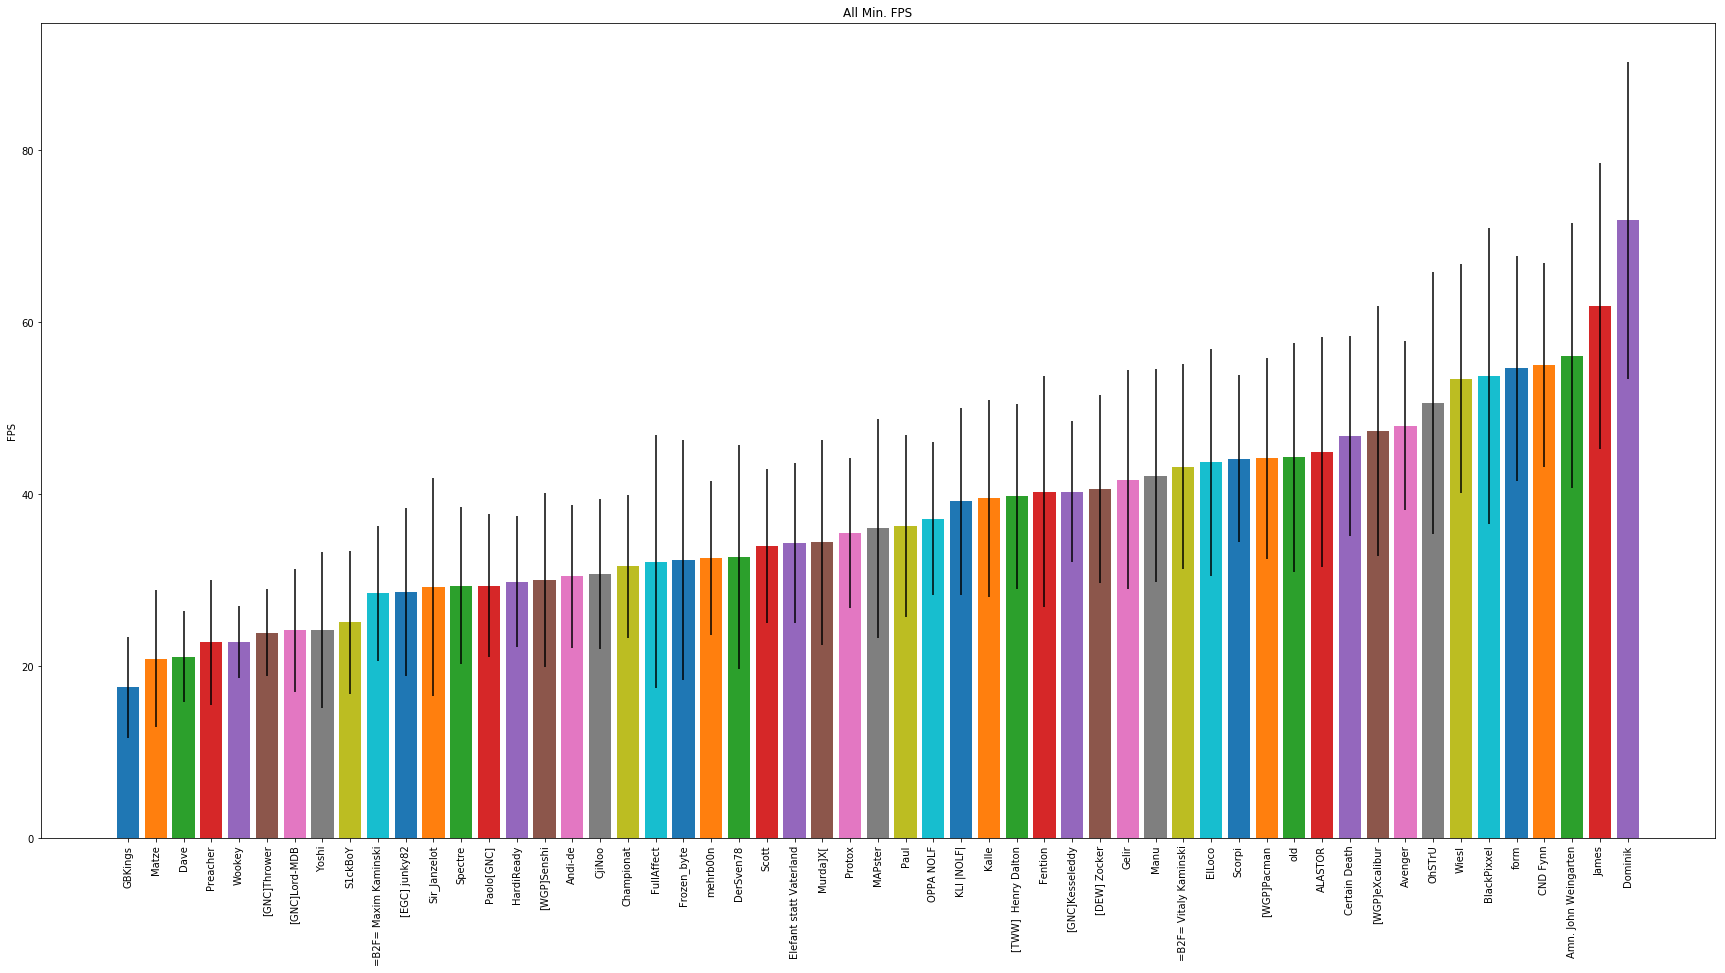

In [13]:
# plot data
col = 1
# all min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Min. FPS")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps.png'))

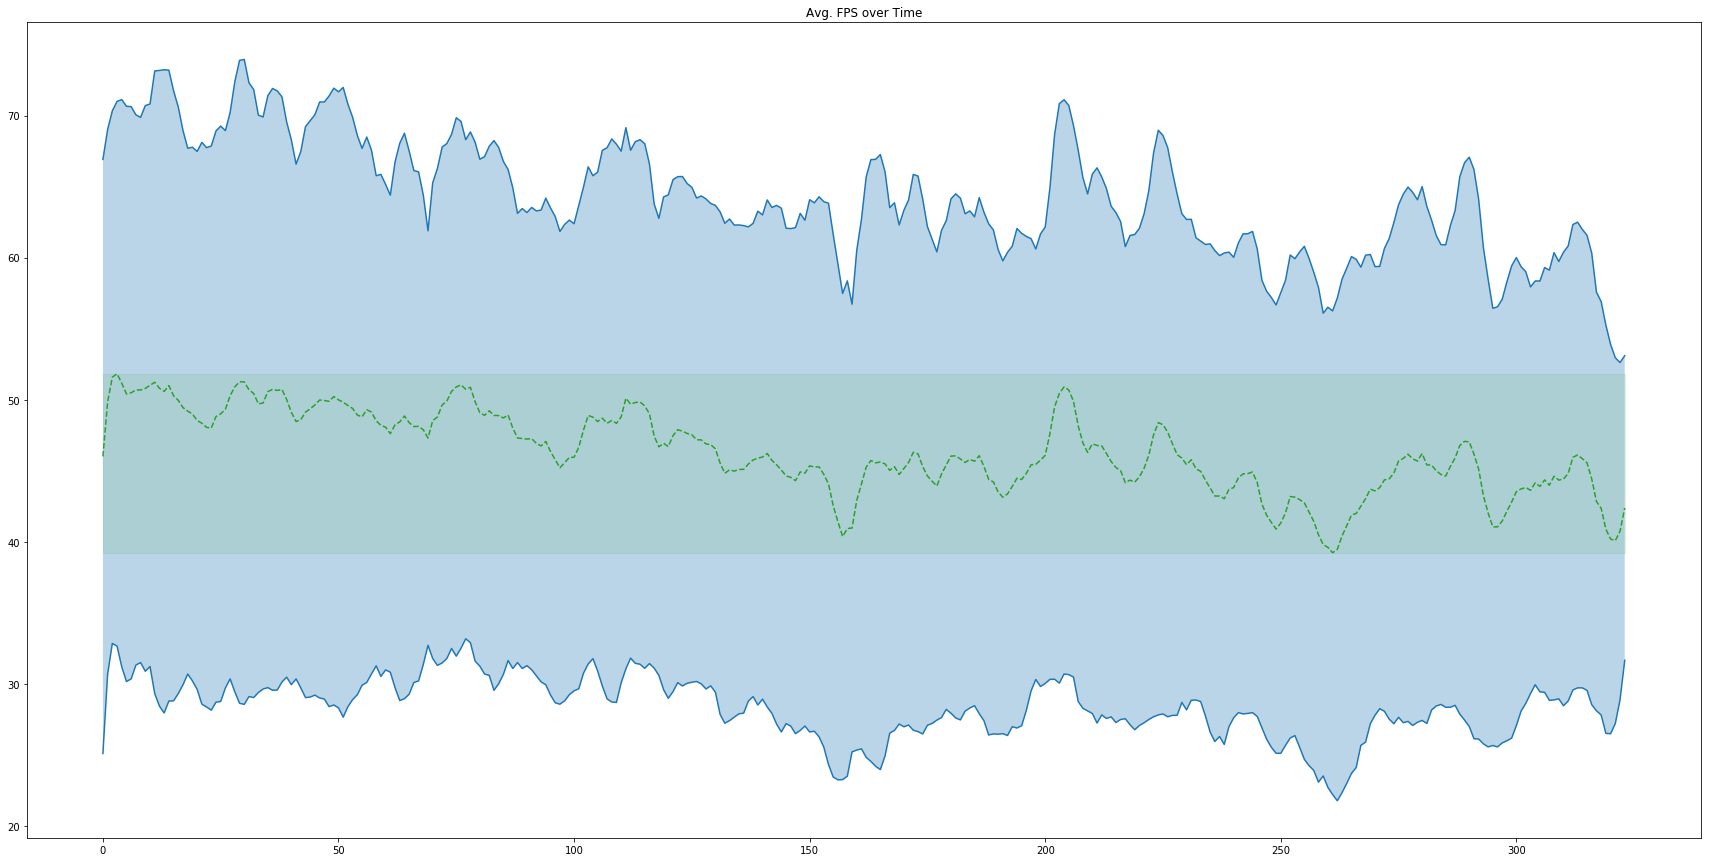

In [15]:
# plot data
from scipy import signal
col = 0

max_nr_fps = np.max([len(x[col]) for x in player_fps.values()])
M = np.empty((len(player_fps), max_nr_fps))
M[:] = np.nan
for i, kv in enumerate(player_fps.items()):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
#print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_avg_fps_over_time.png'))

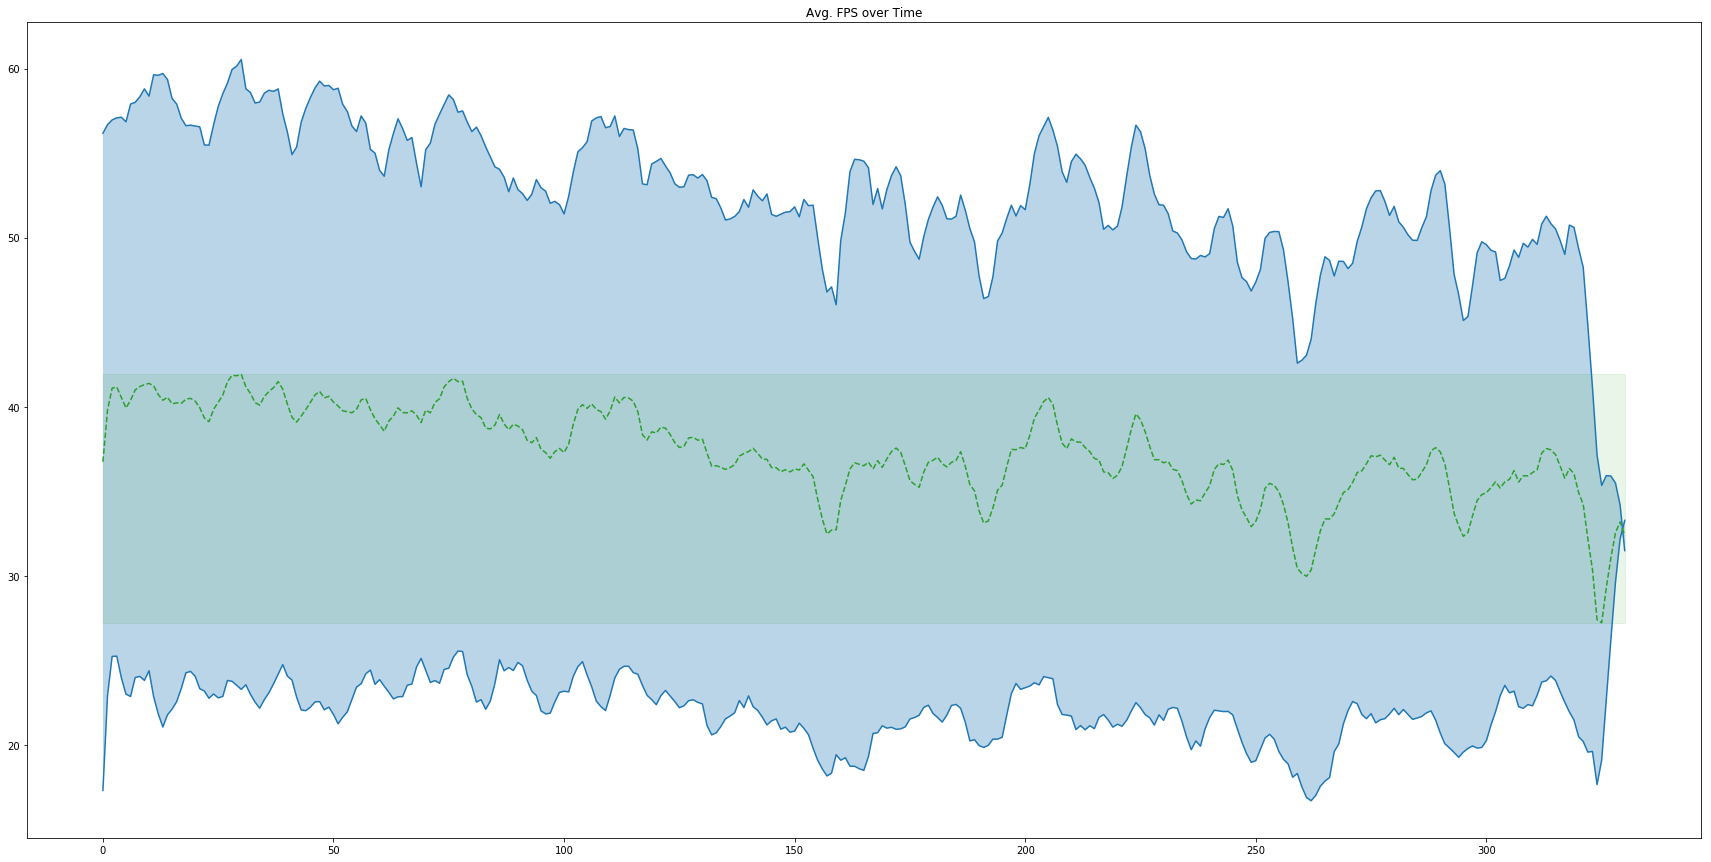

In [16]:
# plot data
from scipy import signal
col = 1

max_nr_fps = np.max([len(x[col]) for x in player_fps.values()])
M = np.empty((len(player_fps), max_nr_fps))
M[:] = np.nan
for i, kv in enumerate(player_fps.items()):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
#print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps_over_time.png'))